In [1]:
# Importing some important librarys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv("train_set.csv")

df1 = pd.read_csv("test_set.csv")

In [3]:
print(df.shape)
print(df1.shape)

(614, 13)
(367, 12)


In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Describe the numerical data

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# describe categorical data ("objec")

df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [8]:
# we will drop ID because it's not important for our model and it will just mislead the model

df.drop('Loan_ID', axis=1, inplace=True)
df1.drop('Loan_ID', axis=1, inplace=True)

In [9]:
df.duplicated().any()
df1.duplicated().any()

# we got no duplicated rows

True

## Checking for missing values

In [10]:
# In Train Data
df.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# In Test Data 
df1.isnull().sum().sort_values(ascending = False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

In [12]:
### Seperating the Numerical and categorical column which posses Null value

Cat_col = ["Gender","Married","Dependents","Self_Employed"]

Num_col = ["LoanAmount","Loan_Amount_Term","Credit_History"]

### Impute the median value to Categorical Values and mean value to Numerical Values

In [13]:
for col in Num_col:
    df[col].fillna(value = df[col].median() , inplace = True)
    df1[col].fillna(value = df1[col].median() , inplace = True)
    
    
for col in Cat_col:
    df[col].fillna(value = df[col].mode()[0] , inplace = True)   
    df1[col].fillna(value = df1[col].mode()[0] , inplace = True)

The percentage of Y class : 0.69
The percentage of N class : 0.31


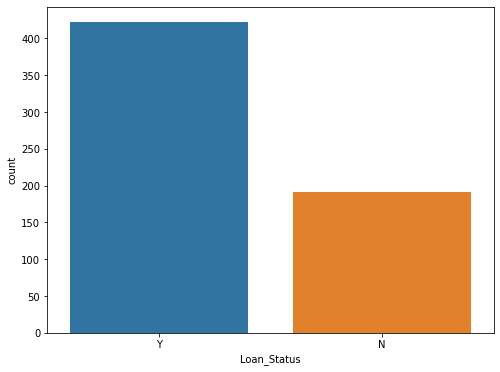

In [14]:
# let's look at the target percentage in train data

plt.figure(figsize=(8,6))
sns.countplot(df['Loan_Status']);

print('The percentage of Y class : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)))
print('The percentage of N class : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)))

# We can consider it as imbalanced data, but for now i will not

## Data Visualization

### Univariate Analysis

### Analysis of Credit_History

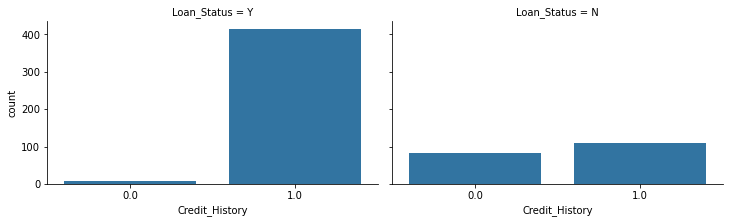

In [15]:
grid = sns.FacetGrid(df, col='Loan_Status', size=3.2, aspect=1.6)

grid.map(sns.countplot, 'Credit_History')
plt.show()

### Conclusion

1. Mostly people who got the loan approval have a Credit History of 1. It implies that if you have a credit history of "1" you will have a better chance to get the loan.

### Analysis of Gender

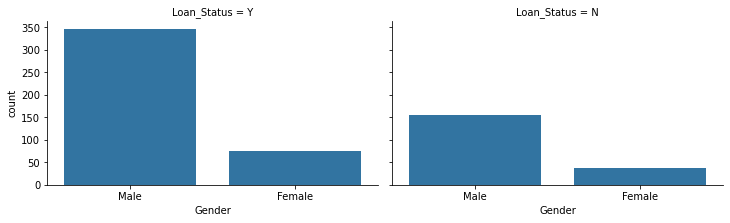

In [16]:
grid = sns.FacetGrid(df , col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender')
plt.show()

### Conclusion

1. Most of the applicants for loan are Males so their proprtion of getting loan is on higher sides.

##  Married

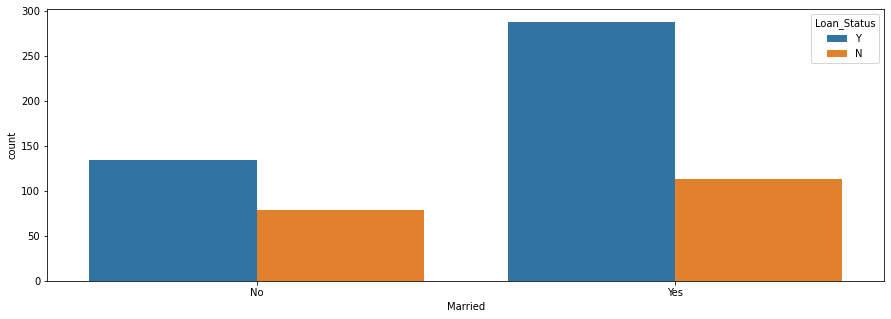

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(x='Married', hue='Loan_Status', data=df)
plt.show()

### Conclusion

1. Most people who got married got a loan.
2. It means if you'r married then you have better chance to get a loan.

## Dependents

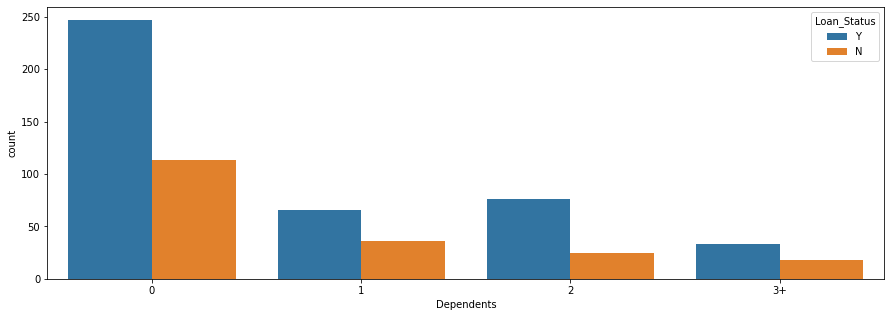

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=df)
plt.show()

### Conclusion

1. If we have no dependents it means we have a higher chance of getting loan.

## Education

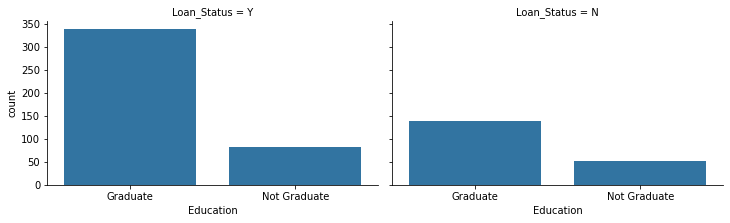

In [19]:
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education')
plt.show()

### Conclusion

1. If you are graduated so you have a good chance to get a loan.
2. On the other hand, most of people who did't graduate also got a loan, but with less percentage from people who graduated

## Self_Employed

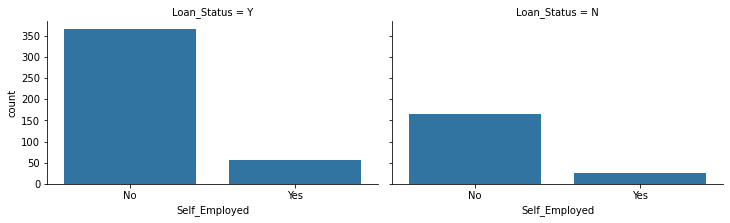

In [20]:
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)

grid.map(sns.countplot, 'Self_Employed')

plt.show()

## Conclusion

1. People who are not self employed it means that who are working under someone has a higher chance of getting loan.

## Property Area

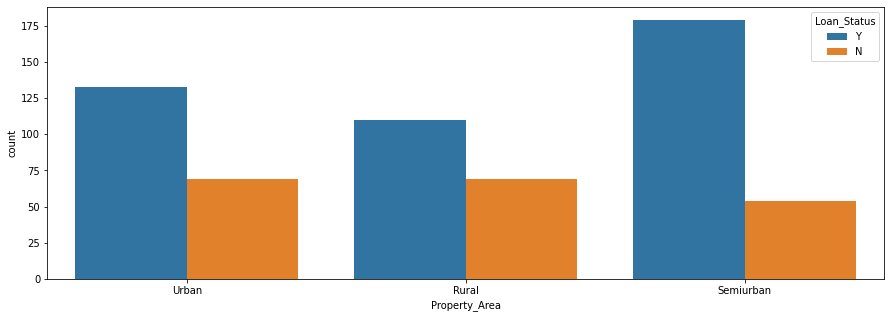

In [21]:
plt.figure(figsize=(15,5))

sns.countplot(x='Property_Area', hue='Loan_Status', data=df)

plt.show()

### Conclusion

1. People who have property in Semiurban Property_Area got have more chance to get a loan.

## Data Visualization of Numerical Variable

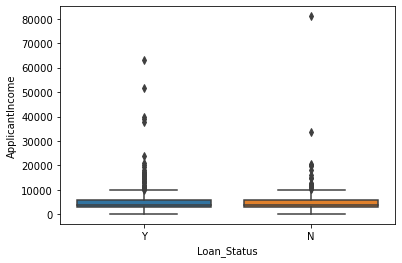

In [22]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome', data= df)
plt.show()

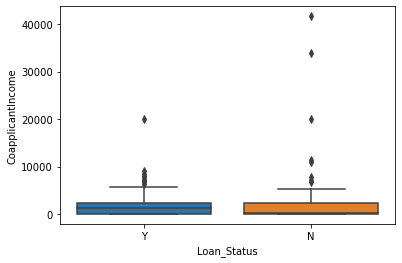

In [23]:
sns.boxplot(x='Loan_Status', y ='CoapplicantIncome', data= df)
plt.show()

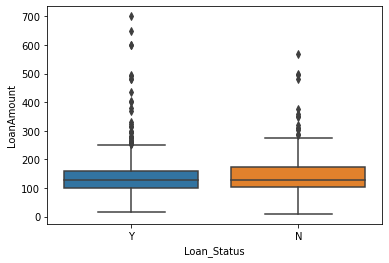

In [24]:
sns.boxplot(x='Loan_Status', y ='LoanAmount', data= df)
plt.show()

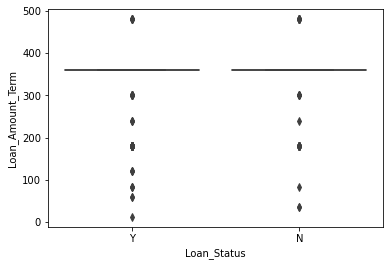

In [25]:
sns.boxplot(x='Loan_Status', y ="Loan_Amount_Term", data= df)
plt.show()

In [26]:
### Creation of new variable

df["Total_income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df1["Total_income"] = df1["ApplicantIncome"] + df1["CoapplicantIncome"]

### Conclusion

1. ALl the numerical features/columns posses right skew as we know if our feature follow bell curve of distribution then it is 
easier to produce a good model so we will do feature transformation.


for outlier treatment of Total_Amount and LoanAmount we use the log transformation method. Due to these outliers, the bulk of the data is at the left with a long right tail. This is called right skewness and log transformation is a good means to remove outliers. The log transformation doesn’t affect smaller instances rather reduces larger values to get a normal distribution.

In [27]:
# applying log transformation to the attribute to transform into bell shape curve from right skew 

# for train data also

df["ApplicantIncome_log"] = np.log(df["ApplicantIncome"])
df["CoapplicantIncome_log"] = np.log(df["CoapplicantIncome"])
df["LoanAmount_log"] = np.log(df["LoanAmount"])
df["Loan_Amount_Term_log"] = np.log(df["Loan_Amount_Term"])
df["Total_income_log"] = np.log(df["Total_income"])


# for test data also
df1["ApplicantIncome_log"] = np.log(df1["ApplicantIncome"])
df1["CoapplicantIncome_log"] = np.log(df1["CoapplicantIncome"])
df1["LoanAmount_log"] = np.log(df1["LoanAmount"])
df1["Loan_Amount_Term_log"] = np.log(df1["Loan_Amount_Term"])
df1["Total_income_log"] = np.log(df1["Total_income"])

In [28]:
# For train data

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col]=le.fit_transform(df[col])        

In [29]:
# For test data

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col]=le.fit_transform(df1[col]) 

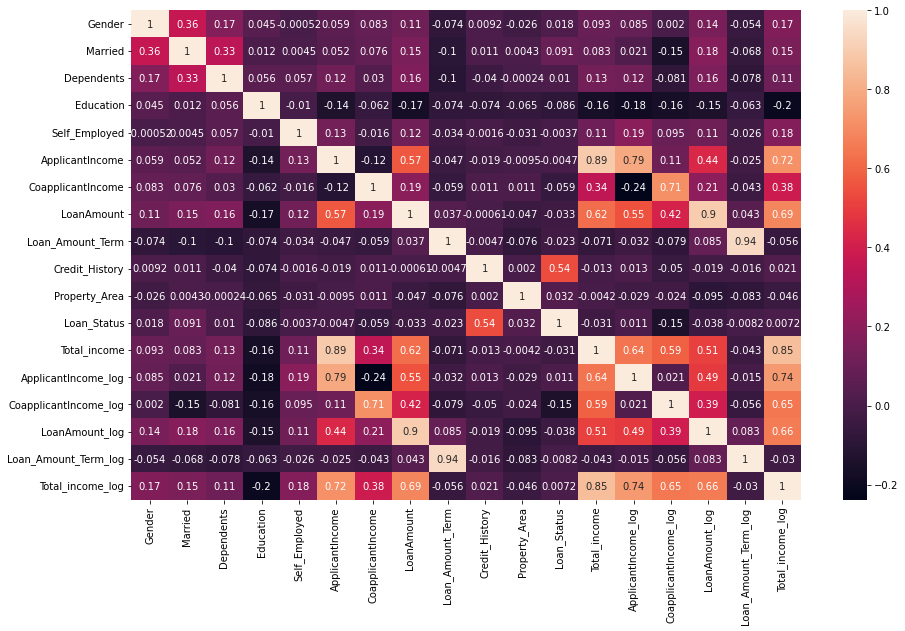

In [30]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)# , cmap='cubehelix_r')
plt.show()

### Conclusion

1. The feature "Credit_History" have a high correlation with Loan_Status
2. There are some feature which are giving high coorelational with itself and with target variable so we will remove these features.

In [31]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_income', 'ApplicantIncome_log', 'CoapplicantIncome_log',
       'LoanAmount_log', 'Loan_Amount_Term_log', 'Total_income_log'],
      dtype='object')

In [32]:
# The features like

df.drop(columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Total_income', 'ApplicantIncome_log', 'CoapplicantIncome_log'], axis = 1 , inplace =True)
df1.drop(columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Total_income', 'ApplicantIncome_log', 'CoapplicantIncome_log'], axis = 1,inplace =True)

### Conclusion from Heatmap

1. The feature "Credit_History" have a high correlation with Loan_Status

In [33]:
X = df.drop(columns = 'Loan_Status')

y =  df["Loan_Status"]

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y , stratify=y , test_size=0.2)

# split the data into test and train by maintaining same distribution of o/p varaible 'y' [stratify=y]

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 10)
(123, 10)
(491,)
(123,)


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

## Building a  Decision Tree Model

In [37]:
# Defining the parameter for using GridSearchCV()

param_grid = {'max_features': ['auto', 'sqrt', 'log2'], # how to use the no of features at a node
              'ccp_alpha': [0.1, .01, .001],            # cost_complexity_pruning_path,
              'max_depth' : [5, 6, 7, 8, 9],            # depth of tree
              'criterion':['gini', 'entropy']           # by which method we use very first node
             }

In [38]:
tree_class = DecisionTreeClassifier(random_state=1024) # defining the instance of Decision-Tree

# we are using GridSearchCV for best hyperparameter tuning

grid_search = GridSearchCV(estimator=tree_class, param_grid =param_grid, cv = 5, verbose=True)

# fitting the grid_search model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [39]:
# final selection of parameter model

grid_search.best_params_


{'ccp_alpha': 0.01,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto'}

In [40]:
# defining the decision tree for best hyperparameter tunned model

dt_final = DecisionTreeClassifier(ccp_alpha = 0.01, criterion = 'entropy', max_depth = 6,max_features = 'auto', random_state=1024)


In [41]:
dt_final.fit(X_train, y_train)

y_predict = dt_final.predict(X_test)

#  prediction Summary by species

print(classification_report(y_test, y_predict))

# Accuracy score

DT_SC = accuracy_score(y_predict,y_test)

print(f"{round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.75      0.47      0.58        38
           1       0.80      0.93      0.86        85

    accuracy                           0.79       123
   macro avg       0.77      0.70      0.72       123
weighted avg       0.78      0.79      0.77       123

78.86% Accurate


## Building a Random Forest Model using GridSearchCV

In [42]:
from sklearn.ensemble import RandomForestClassifier

# defining the instance of RandomForest
rfc = RandomForestClassifier(random_state=1024)

In [43]:
# Defining the parameter for using GridSearchCV()


param_grid = { 
    'n_estimators': [50,100,150,200,250],               # no of decision tree
    'max_features': ['auto', 'sqrt', 'log2'], # how to use the no of features at a node
    'max_depth' : [4,5,6,7,8],                # depth of tree  
    'criterion' :['gini', 'entropy']          # by which method we use very first node
}

In [44]:
# we are using GridSearchCV for best hyperparameter tuning

GS_CV = GridSearchCV(estimator = rfc, param_grid=param_grid, cv= 5)
GS_CV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1024),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [45]:
# final selection of parameter model
A=GS_CV.best_params_
A

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 50}

In [47]:
A['criterion']

'gini'

In [48]:
Random_forest = RandomForestClassifier(random_state=42, max_features=A['max_features'], n_estimators= A['n_estimators'], max_depth =A['max_depth'], criterion=A['criterion'])

In [49]:
Random_forest.fit(X_train, y_train)

y_predict = Random_forest.predict(X_test)

#  prediction Summary by species

print(classification_report(y_test, y_predict))

# Accuracy score

DT_SC = accuracy_score(y_predict,y_test)

print(f"{round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.94      0.39      0.56        38
           1       0.79      0.99      0.88        85

    accuracy                           0.80       123
   macro avg       0.86      0.69      0.72       123
weighted avg       0.83      0.80      0.78       123

80.49% Accurate


In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
grid={"C": np.logspace(-3,3,7), "penalty":["l1","l2"]}   # l1 lasso l2 ridge

logreg = LogisticRegression()

logreg_cv = GridSearchCV(logreg , grid , cv=10)

logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [95]:
logreg_cv.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [96]:
logreg2 = LogisticRegression(C = 0.1,penalty = "l2")

logreg2.fit(X_train,y_train)


LogisticRegression(C=0.1)

In [97]:
#  prediction Summary 

y_predict = logreg2.predict(X_test)

print(classification_report(y_test, y_predict))

# Accuracy score

LR_SC = accuracy_score(y_predict,y_test)

print(f"{round(LR_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.89      0.45      0.60        38
           1       0.80      0.98      0.88        85

    accuracy                           0.81       123
   macro avg       0.85      0.71      0.74       123
weighted avg       0.83      0.81      0.79       123

81.3% Accurate


# Now we apply our  Random Forest models to our unseen test data which is alreday pre-proceed

In [98]:
predict_y = Random_forest.predict(df1)

In [99]:
predict_y

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [100]:
# Converting our predict_y to dataframe

df2 = pd.DataFrame(data = predict_y , columns = ['Predicted_Loan_Status'])

In [101]:
my_test_data = pd.concat([df1,df2], axis =1, join = 'inner')

In [102]:
my_test_data["Predicted_Loan_Status"].value_counts()

1    308
0     59
Name: Predicted_Loan_Status, dtype: int64

## Converting my test dataframe which is earlier stored in df1 after that in my_test_data now in test_with_label.csv

In [103]:
my_test_data.to_csv('test_with_label.csv')